<a href="https://colab.research.google.com/github/codernayeem/dl-practice/blob/main/fashion_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
pd.Series(y_train).value_counts().sort_index()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
def plot_img(index, col=5, single_plot_size=(2, 2)):
    n = len(index)
    if n < col:
        col = n
    row = n // col + 1
    plt.figure(figsize=(single_plot_size[0]*col, single_plot_size[1]*row))
    plt.gray()
    for i, ii in enumerate(index):
        plt.subplot(row, col, i+1)
        plt.imshow(X_train[ii], cmap=plt.cm.binary)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(class_names[y_train[ii]])
    plt.show()

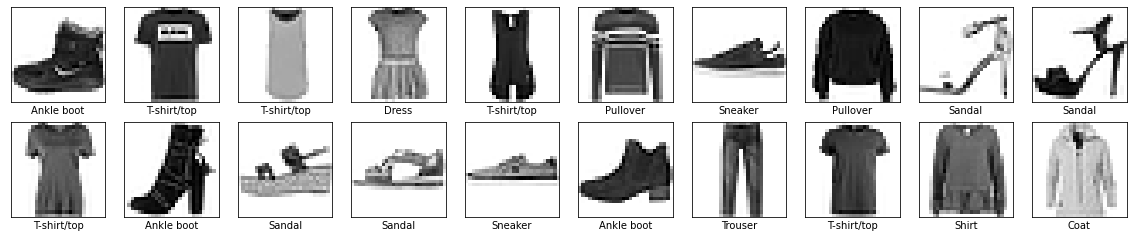

In [7]:
plot_img(range(20), col=10)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
X_train, X_test = X_train / 255, X_test / 255

In [26]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5026 - accuracy: 0.8231
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3743 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3386 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3124 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2931 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2766 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2650 - accuracy: 0.9022
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2550 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2464 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3271 - accuracy: 0.8875


[0.3270982503890991, 0.887499988079071]

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [28]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[8.1759154e-08, 1.5787823e-08, 2.9885200e-08, 1.4319828e-07,
        2.6583618e-06, 8.4573254e-03, 2.6092812e-07, 5.0932590e-02,
        1.1395763e-06, 9.4060576e-01],
       [2.8469503e-05, 3.7297649e-14, 9.9881196e-01, 2.3353713e-11,
        1.0983463e-03, 4.3569020e-15, 6.1236096e-05, 2.4611297e-16,
        2.2490394e-10, 7.1703711e-14],
       [3.0568671e-07, 9.9999964e-01, 2.0324018e-12, 7.6297555e-09,
        1.9478625e-11, 4.5896075e-25, 2.9154185e-10, 4.8128508e-28,
        2.7581729e-14, 8.5112089e-22],
       [1.1774773e-07, 9.9999058e-01, 8.0599177e-10, 9.2732307e-06,
        1.3769031e-09, 1.2599883e-18, 1.5055619e-08, 6.0730334e-22,
        3.3470248e-13, 1.6933691e-15],
       [3.5948333e-01, 2.0031999e-07, 1.8325135e-02, 3.3451317e-05,
        1.6859781e-04, 6.3795291e-08, 6.2198240e-01, 4.1126338e-10,
        6.7947904e-06, 9.3657766e-09]], dtype=float32)

In [30]:
y_pred_actual = np.array([], dtype=int)
for i in y_pred:
    y_pred_actual = np.append(y_pred_actual, np.argmax(i))
y_pred_actual[:5]

array([9, 2, 1, 1, 6])

In [31]:
print(classification_report(y_test, y_pred_actual))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1000
           1       1.00      0.97      0.98      1000
           2       0.77      0.80      0.79      1000
           3       0.92      0.84      0.88      1000
           4       0.77      0.82      0.80      1000
           5       0.98      0.97      0.97      1000
           6       0.71      0.66      0.68      1000
           7       0.92      0.98      0.95      1000
           8       0.99      0.96      0.97      1000
           9       0.98      0.92      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [32]:
def print_confusion_matrix(confusion_matrix, class_names, figsize=(10,7), fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

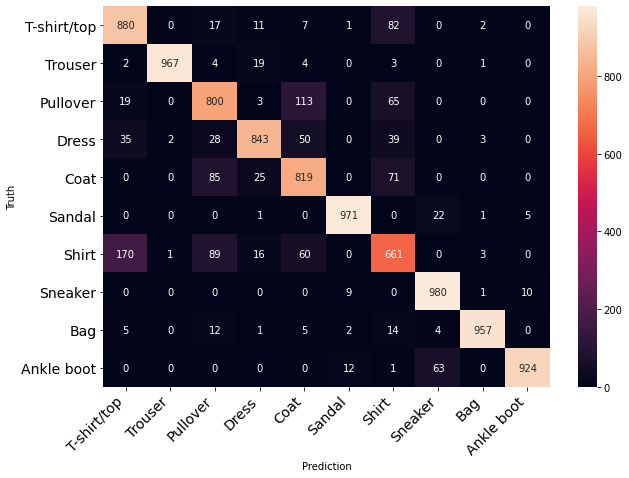

In [33]:
cm = confusion_matrix(y_test, y_pred_actual)
print_confusion_matrix(cm, class_names)

In [34]:
do_not_match_index = []
for i in range(len(y_test)):
   if y_test[i] != y_pred_actual[i]:
      do_not_match_index.append(i)
do_not_match_index[:5]

[12, 17, 23, 25, 29]

In [35]:
def plot_test_img(index, col=5, single_plot_size=(2, 2)):
    n = len(index)
    if n < col:
        col = n
    row = n // col + 1
    plt.figure(figsize=(single_plot_size[0]*col, single_plot_size[1]*row))
    plt.gray()
    for c, i in enumerate(index):
        plt.subplot(row, col, c+1)
        plt.imshow(X_test[i], cmap=plt.cm.binary)
        plt.xticks([])
        plt.yticks([])
        plt.ylabel(f'Truth: {class_names[y_test[i]]}')
        plt.xlabel("{} {:2.0f}%".format(class_names[y_pred_actual[i]], 100*np.max(y_pred[i])))
    plt.show()

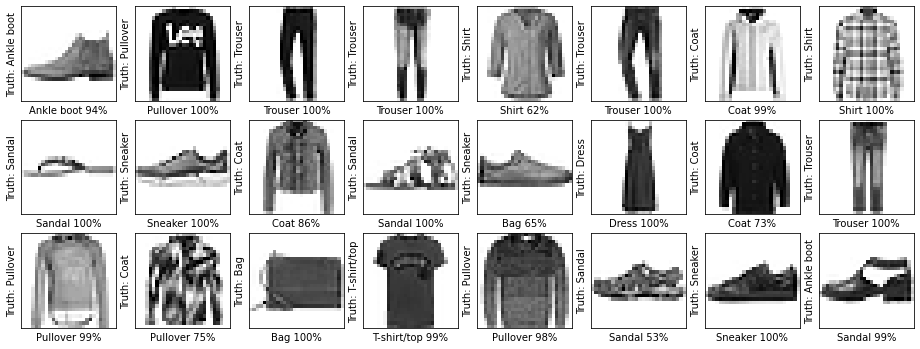

In [36]:
plot_test_img(range(24), col=8)

In [37]:
len(do_not_match_index)

1198

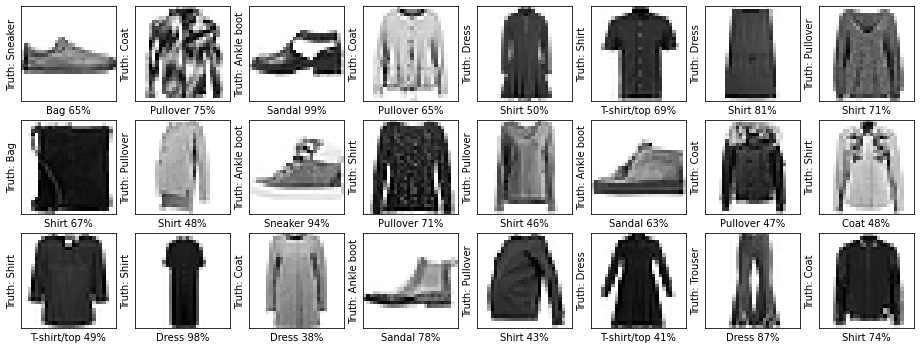

In [38]:
plot_test_img(do_not_match_index[:24], col=8)